In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM
from keras.utils import np_utils

import os

# brew install graphviz
# pip3 install graphviz
# pip3 install pydot-ng
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#sample text
sample = "hihello"

In [3]:
char_set = list(set(sample))  # id -> char ['i', 'l', 'e', 'o', 'h']
char_dic = {w: i for i, w in enumerate(char_set)}
print(char_dic)

{'h': 0, 'o': 1, 'l': 2, 'i': 3, 'e': 4}


In [4]:
x_str = sample[:-1]
y_str = sample[1:]

In [5]:
data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)
print(x_str, y_str)

hihell ihello


In [6]:
x = [char_dic[c] for c in x_str]  # char to index
y = [char_dic[c] for c in y_str]  # char to index
print(x)
print(y)

[0, 3, 0, 4, 2, 2]
[3, 0, 4, 2, 2, 1]


In [7]:
# One-hot encoding
x = np_utils.to_categorical(x, num_classes=num_classes)
# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
print(x.shape)
print(x[0])

(1, 6, 5)
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [8]:
# One-hot encoding
y = np_utils.to_categorical(y, num_classes=num_classes)
# time steps
y = np.reshape(y, (-1, len(y), data_dim))
print(y.shape)

(1, 6, 5)


In [9]:
model = Sequential()
model.add(Dense(num_classes, input_shape=(timesteps, data_dim)))
model.add(Activation('softmax'))
model.summary()
# Store model graph in png
# (Error occurs on in python interactive shell)
#plot_model(model, to_file=os.path.basename(__file__) + '.png', show_shapes=True)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

W0315 12:41:49.848296  8488 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0315 12:41:49.883847  8488 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 12:41:49.891828  8488 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"

W0315 12:41:50.014600  8488 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0315 12:41:50.116825  8488 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6, 5)              30        
_________________________________________________________________
activation_1 (Activation)    (None, 6, 5)              0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x, y, epochs=200, verbose=1)

W0315 12:41:50.707105  8488 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0315 12:41:51.110318  8488 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
1/1 [==============================] - 1s 625ms/step - loss: 1.7769 - acc: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 1.7717 - acc: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7680 - acc: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7649 - acc: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.7621 - acc: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7596 - acc: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 1.7572 - acc: 0.0000e+00
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7550 - acc: 0.0000e+00
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 1.7529 - acc: 0.0000e+00
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 1.7508 - acc: 0.0000e+00
Epoch 11/200
1/1 [==================

Epoch 87/200
1/1 [==============================] - 0s 3ms/step - loss: 1.6298 - acc: 0.3333
Epoch 88/200
1/1 [==============================] - 0s 3ms/step - loss: 1.6283 - acc: 0.3333
Epoch 89/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6269 - acc: 0.3333
Epoch 90/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6254 - acc: 0.3333
Epoch 91/200
1/1 [==============================] - 0s 4ms/step - loss: 1.6239 - acc: 0.3333
Epoch 92/200
1/1 [==============================] - 0s 6ms/step - loss: 1.6225 - acc: 0.3333
Epoch 93/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6210 - acc: 0.3333
Epoch 94/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6196 - acc: 0.3333
Epoch 95/200
1/1 [==============================] - 0s 6ms/step - loss: 1.6181 - acc: 0.3333
Epoch 96/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6167 - acc: 0.3333
Epoch 97/200
1/1 [==============================] - 0s 2ms/step - loss

Epoch 175/200
1/1 [==============================] - 0s 5ms/step - loss: 1.5074 - acc: 0.3333
Epoch 176/200
1/1 [==============================] - 0s 3ms/step - loss: 1.5061 - acc: 0.3333
Epoch 177/200
1/1 [==============================] - 0s 998us/step - loss: 1.5048 - acc: 0.3333
Epoch 178/200
1/1 [==============================] - 0s 5ms/step - loss: 1.5035 - acc: 0.3333
Epoch 179/200
1/1 [==============================] - 0s 6ms/step - loss: 1.5022 - acc: 0.3333
Epoch 180/200
1/1 [==============================] - 0s 2ms/step - loss: 1.5009 - acc: 0.3333
Epoch 181/200
1/1 [==============================] - 0s 2ms/step - loss: 1.4995 - acc: 0.3333
Epoch 182/200
1/1 [==============================] - 0s 3ms/step - loss: 1.4982 - acc: 0.3333
Epoch 183/200
1/1 [==============================] - 0s 3ms/step - loss: 1.4969 - acc: 0.3333
Epoch 184/200
1/1 [==============================] - 0s 3ms/step - loss: 1.4956 - acc: 0.3333
Epoch 185/200
1/1 [==============================] - 0s 2m

In [11]:
predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

[[0.19494557 0.12107623 0.3027139  0.25443733 0.12682696]
 [0.17632699 0.22471425 0.15624435 0.08550175 0.35721272]
 [0.19494557 0.12107623 0.3027139  0.25443733 0.12682696]
 [0.12937403 0.11357414 0.39194596 0.24733858 0.11776733]
 [0.15186705 0.2100355  0.3083889  0.17434692 0.15536161]
 [0.15186705 0.2100355  0.3083889  0.17434692 0.15536161]]
[0 3 0 4 2 2] hihell
[2 4 2 2 2 2] lellll


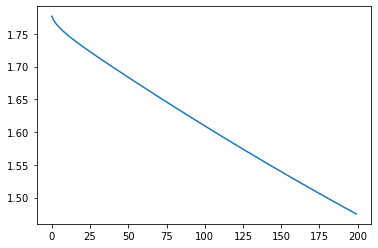

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()